In [1]:
# Problem Set 2, due April 20 (22 now because capstone) at 11:59am (i.e., noon).

Worked with Annie Tao

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline 
pd.options.display.max_columns = 50

C:\Anaconda3\envs\py27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
progresa_df = pd.read_csv('progresa_sample.csv')

replacement = {'pobre':1, 'no pobre':0, '0': 0, 'basal':1}
progresa_df = progresa_df.replace({'poor':replacement, 'progresa':replacement})

columns = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n',
       'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age', 'grc97', 'sc97']
columns = sorted(columns, key=str.lower)

data = []
for column in columns:
    row = []
    row.append(column)
    row.append(progresa_df[column].mean())
    row.append(progresa_df[column].std())
    data.append(row)

summary = pd.DataFrame(data)
summary.columns = ['name', 'mean', 'std']
summary

,name,mean,std
0,age,11.366460,3.167744
1,dist_cap,147.674452,76.063134
2,dist_sec,2.418910,2.234109
3,fam_n,7.215715,2.352900
4,grc,3.963537,2.499063
5,grc97,3.705372,2.572387
6,hohage,44.436717,11.620372
7,hohedu,2.768104,2.656106
8,hohsex,0.925185,0.263095
9,hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [4]:
columns = ['sex', 'indig', 'dist_sec', 'fam_n',
       'min_dist', 'dist_cap', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age', 'grc97', 'sc97']
columns = sorted(columns, key=str.lower)

data = []
for column in columns:
    row = []
    row.append(column)
    
    treatment = progresa_df[progresa_df.year == 97][progresa_df.progresa == 1][progresa_df.poor == 1][column]
    control = progresa_df[progresa_df.year == 97][progresa_df.progresa == 0][progresa_df.poor == 1][column]
    treat_mean = treatment.mean()
    control_mean = control.mean()
    
    row.append(treat_mean)
    row.append(control_mean)
    row.append(treat_mean - control_mean)
    
    tstat, pval = stats.ttest_ind(treatment, control, nan_policy='omit')
    row.append(tstat)
    row.append(pval)
    
    data.append(row)

summary = pd.DataFrame(data)
summary.columns = ['variable', 'average Treatment', 'average Control', 'difference', 't-stat', 'p-value']
summary

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,variable,average Treatment,average Control,difference,t-stat,p-value
0,age,10.716991,10.742023,-0.025032,-0.708630,4.785594e-01
1,dist_cap,150.829074,153.769730,-2.940656,-3.339081,8.415005e-04
2,dist_sec,2.453122,2.507662,-0.054540,-2.100433,3.569843e-02
3,fam_n,7.281327,7.302469,-0.021142,-0.794167,4.271039e-01
4,grc97,3.531599,3.543050,-0.011450,-0.400196,6.890151e-01
5,hohage,43.648828,44.276918,-0.628090,-4.775962,1.796243e-06
6,hohedu,2.663139,2.590348,0.072791,2.541229,1.105093e-02
7,hohsex,0.924656,0.922947,0.001709,0.566312,5.711858e-01
8,hohwag,544.339544,573.163558,-28.824015,-3.594588,3.253835e-04
9,indig,0.325986,0.332207,-0.006222,-1.161714,2.453603e-01


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

There are some statistically significant differences between control and treatment. They are in average distance to the capital, distance to secondary school, head of house age, head of house education, head of house wages, min distance to urban centers, sex, and welfare index. These differences may not be practically significant, however.

It matters because if the contorl and treatment are significantly different before treatment is applied then the control may not be a good estimation of the counterfactual of the treatment group. Control may not represent what would have happened without treatment if they were significantly different before we did anything.

The impact of the treatment must take into account these other statictically significant variables. It depends on how we calculate the treatment effect though. There are techniques which take into account differences between the treatment group and the control group. We could take a double difference and assume, even though they are different, they would have changed in the same way. We could add control variables to our calculations to catch these differences and account for them.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2


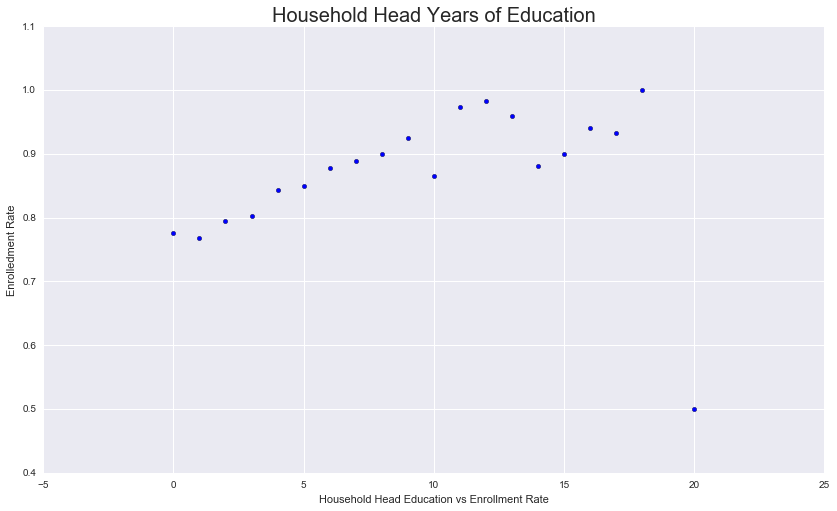

In [5]:
x = []
y = []
print (progresa_df[progresa_df.year == 97][progresa_df.hohedu == 20].sc97.count())
for i in range(progresa_df[progresa_df.year == 97].hohedu.max() + 1):
    x.append(i)
    y.append(progresa_df[progresa_df.year == 97][progresa_df.hohedu == i].sc97.mean())
    
plt.scatter(x,y)
plt.gcf().set_size_inches(14,8)
plt.xlabel('Household Head Education vs Enrollment Rate')
plt.ylabel('Enrolledment Rate')
plt.title('Household Head Years of Education', fontsize=20)

It trends upwards. Except this outlier at 20, though the "average" at 20 is not particularly useful as there are only 2 data points where the head of house had 20 years education.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


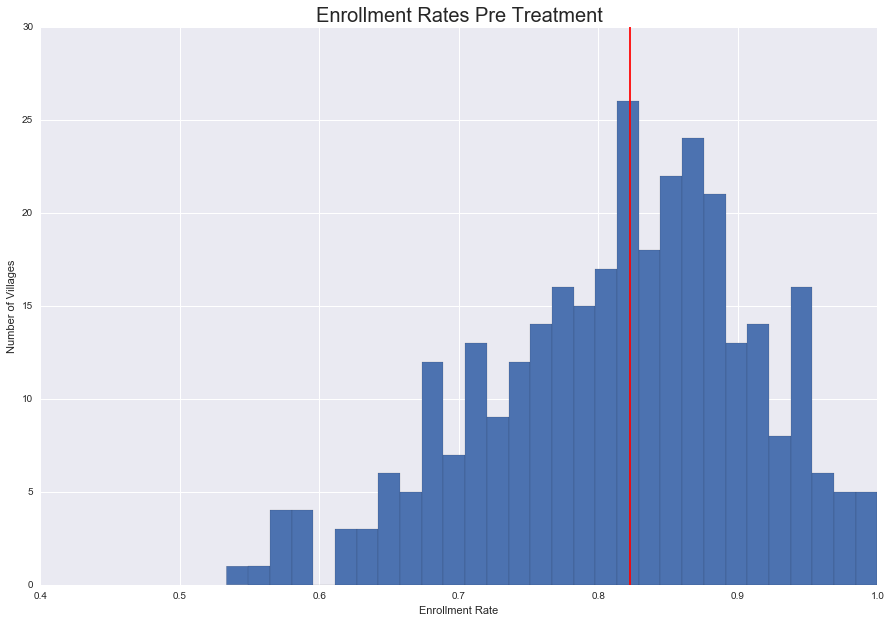

In [6]:
pretreat = progresa_df[progresa_df.year == 97][progresa_df.progresa == 1][progresa_df.poor == 1]
previllages = pretreat.village.unique()
predata = []

for village in previllages:
    predata.append(pretreat[pretreat.village == village].sc.mean())

preave = pretreat.sc.mean()

plt.hist(predata,
         bins = 30,
         linewidth = 0.1)

plt.xlim(0.4,1)
plt.gcf().set_size_inches(15,10)
plt.xlabel('Enrollment Rate')
plt.ylabel('Number of Villages')
plt.title('Enrollment Rates Pre Treatment', fontsize=20)
plt.axvline(preave, color='red')

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


mean 0.846479121395


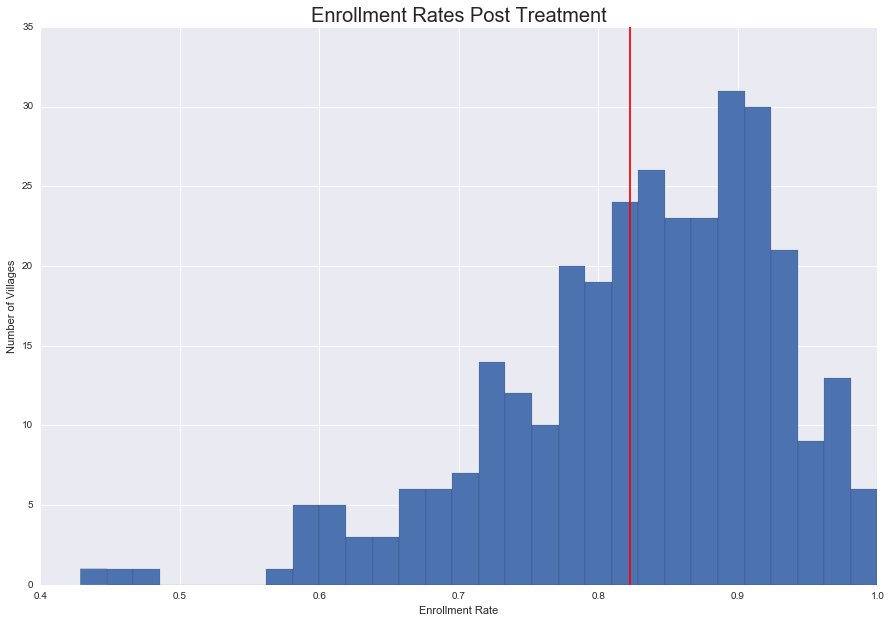

In [7]:
posttreat = progresa_df[progresa_df.year == 98][progresa_df.progresa == 1][progresa_df.poor == 1]
postvillages = posttreat.village.unique()
postdata = []

for village in postvillages:
    postdata.append(posttreat[posttreat.village == village].sc.mean())

postave = posttreat.sc.mean()

print ('mean ' + str(postave))
plt.hist(postdata,
         bins = 30,
         linewidth = 0.1)

plt.xlim(0.4,1)
plt.gcf().set_size_inches(15,10)
plt.xlabel('Enrollment Rate')
plt.ylabel('Number of Villages')
plt.title('Enrollment Rates Post Treatment', fontsize=20)
plt.axvline(preave, color='red')

In [8]:
print (stats.ttest_ind(predata, postdata, nan_policy='omit'))
# print (stats.ttest_ind(pretreat.sc, posttreat.sc, nan_policy='omit'))

Ttest_indResult(statistic=-2.015713486515581, pvalue=0.044248700365727124)


The histogram appears to skew a bit further right after treatment. The mean also moved up after treatment. the differnce is statistically significant with a pvalue of ~0.044.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [9]:
treat = progresa_df[progresa_df.year == 98][progresa_df.poor == 1][progresa_df.progresa == 1]
control = progresa_df[progresa_df.year == 98][progresa_df.poor == 1][progresa_df.progresa == 0]

print ('control mean ' + str(control.sc.mean()))
print ('treatment mean ' + str(treat.sc.mean()))
print (treat.sc.mean() - control.sc.mean())

print (stats.ttest_ind(treat.sc, control.sc, nan_policy='omit'))

control mean 0.80763695673
treatment mean 0.846479121395
0.0388421646651
Ttest_indResult(statistic=8.3587205674183735, pvalue=6.6363444473781018e-17)


C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


The simple difference taking the control group as the estimation of the ounterfactual shows a statistically significant effect of treatment of ~.0388 to enrollment rate with a pvalue of ~6.6*10^-16.

I can conclude that this model predicts this effect and it is probably true that there is one, but I do not know how accurate the prediction is. This model does not take into account the inherant differences between the control and treatment groups for example. It looks only at the values of SC and assumes that control is a correct counterfactual, despite the differences between the groups seen in 1.2.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [10]:
mod = smf.ols(formula='sc ~ progresa', data=progresa_df[progresa_df.year == 98][progresa_df.poor == 1])
result = mod.fit()

print result.summary()
print 'pvalues'
print result.pvalues
print 'error'
print result.bse

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           6.64e-17
Time:                        10:25:52   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Treatment increased the chance of a child enrolling by .0388 acording to this model.

This is the same as the previous simple differnce test. As such the beta of ~.0388 is the same as is the pvalue. The standard error is ~.0046

We can reject the null hypothesis that the treatment effect is 0.

As in 2.1 the counterfactual is assumed to be estimated by the control group. There are arguments that this is incorrect.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [11]:
mod = smf.ols(formula='sc ~ progresa + sc97 + grc97 + grc + age + dist_sec + sex + indig + fam_n + min_dist + dist_cap + hohwag + hohedu + welfare_index + hohage + hohsex', data=progresa_df[progresa_df.year == 98][progresa_df.poor == 1])
result = mod.fit()

print result.summary()
print 'pvalue'
print result.pvalues['progresa']
print 'error'
print result.bse['progresa']

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1345.
Date:                Fri, 22 Apr 2016   Prob (F-statistic):               0.00
Time:                        10:25:52   Log-Likelihood:                -3347.5
No. Observations:               26155   AIC:                             6729.
Df Residuals:                   26138   BIC:                             6868.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.7796      0.021     38.019

It lowered the estimate of the treatment effect a bit, down to ~.0319. It also lowered the error to ~.0035. The p values is ~1.5*10^-19

This makes a more nuanced model than 2.2, it takes into account the other variables and reduced the error of the prediction. This model will then take into account the differnces between treatment and control other than the treatment itself.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [12]:
treatpremean = progresa_df[progresa_df.year == 97][progresa_df.progresa == 1][progresa_df.poor == 1].sc.mean()
treatpostmean = progresa_df[progresa_df.year == 98][progresa_df.progresa == 1][progresa_df.poor == 1].sc.mean()
treatdiff = treatpostmean - treatpremean

controlpremean = progresa_df[progresa_df.year == 97][progresa_df.progresa == 0][progresa_df.poor == 1].sc.mean()
controlpostmean = progresa_df[progresa_df.year == 98][progresa_df.progresa == 0][progresa_df.poor == 1].sc.mean()
controldiff = controlpostmean - controlpremean

doublediff = treatdiff - controldiff

print 'treatment'
print treatdiff
print 'control'
print controldiff
print 'doblediff'
print doublediff

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


treatment
0.023782233992
control
-0.00754904632728
doblediff
0.0313312803193


C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


The estimated impact of this model is ~.0313. It is very simlar to the results of the simple difference regression that took into account the control variables, but much farther from the simple simple difference.

The counterfactual assumption here is that the treatment group would have, in the absence of treatment, changed in the same way from 97 to 98 as the control group did, and that is the counterfactual we measure the effect against.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [13]:
replacement = {98: 1, 97: 0}
progresa_df_dd = progresa_df.replace({'year': replacement})

mod = smf.ols(formula='sc ~ progresa + year + (progresa * year) + grc + age + dist_sec + sex + indig + fam_n + min_dist + dist_cap + hohwag + hohedu + welfare_index + hohage + hohsex', data=progresa_df_dd[progresa_df.poor == 1])
result = mod.fit()
print result.summary()
print 'pvalue'
print result.pvalues['progresa:year']
print 'error'
print result.bse['progresa:year']

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1631.
Date:                Fri, 22 Apr 2016   Prob (F-statistic):               0.00
Time:                        10:25:52   Log-Likelihood:                -15320.
No. Observations:               57938   AIC:                         3.067e+04
Df Residuals:                   57921   BIC:                         3.083e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.6163      0.014    119.229

This model estimates the impact of progresa as a ~.0292 change in enrollment rate as a result of the treatment. This effect is very confident with a tiny pvalue of ~7.08*10^-8 and accurate to an error ~.0054

The estimate is again a bit smaller than the simple differences, both single and multiple.

The estimate is different from 2.4 because this version accounts for all the control variables and their effects.

The counterfactual assumption is again that the treatment group would have, without treatment, changed in the same way as the control group but this time the counterfactual takes into account the control variables.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

Based on my analysis I do believe progresa had an impact. Every single model predicted some sort of impact (usually around ~.03) with pretty high levels of statistical significance. If every model is useful, all the models together pointing to the same result is an indication that the result is probably correct.

We might consider measuring the pre and post non-poor groups as a second 'control' group. We would take into account control variables of course, but this would help us to model the effect on enrollment of other variables. The counterfactual assumption here would be that the non-poor change in a related way to how the poor treatment group would have changed had it not been treated.